# Define Imports

In [14]:
from scipy.io import loadmat
from datetime import datetime
import polars as pl
import cv2
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")
import matplotlib.pylab as plt
import numpy as np
from drawingto3D import data_manager, surface
import pyvista as pv

# Load in and Format Matlab Data

In [15]:
# Load in the Matlab data
data = loadmat("../Data/ExampleLocationDataMultipleDrawingsPerPercept.mat")

# Get Subject IDs
subject_id = []
for id in data["ExampleData"]["SubjectID"][0]:
    subject_id.append(id[0])

# Get Experiment Date
experiment_date = []
for date in data["ExampleData"]["ExperimentDate"][0]:
    experiment_date.append(datetime.strptime(date[0], "%d-%b-%Y"))

# Get Amputation Site
amputation_site = []
for site in data["ExampleData"]["AmputationSite"][0]:
    amputation_site.append(site[0])

# Get Nerve Name
nerve_name = []
for nerve in data["ExampleData"]["NerveName"][0]:
    nerve_name.append(nerve[0])

# Get Contact
contact = []
for cathode in data["ExampleData"]["Contact"][0]:
    contact.append(cathode[0][0])

# Get Centroid UV Map
centroid_x = []
centroid_y = []
for center in data["ExampleData"]["CentroidUVMap"][0]:
    centroid_x.append(center[0][0])
    centroid_y.append(center[0][1])

# Get Boundary Points
boundary = []
for path in data["ExampleData"]["Boundaries"][0]:
    boundary.append(path.tolist())

# Get Charge
charge = []
for c in data["ExampleData"]["Charge"][0]:
    charge.append(c[0][0])

# Save everything to a polars DataFrame
example_data = pl.DataFrame(
    {
        "Subject ID": subject_id,
        "Experiment Date": experiment_date,
        "Amputation Site": amputation_site,
        "Nerve Name": nerve_name,
        "Contact": contact,
        "Centroid X": centroid_x,
        "Centroid Y": centroid_y,
        "Boundary": boundary,
        "Charge": charge,
    }
)

example_data =\
    example_data.with_row_index().filter(pl.col("index") != 10).drop("index")
example_data

Subject ID,Experiment Date,Amputation Site,Nerve Name,Contact,Centroid X,Centroid Y,Boundary,Charge
str,datetime[μs],str,str,u8,f32,f32,list[list[f64]],u8
"""RCT01""",2021-12-03 00:00:00,"""Right hand""","""Ulnar""",1,212.048645,743.167419,"[[158.301804, 574.895752], [162.242188, 574.905701], … [158.301804, 574.895752]]",65
"""RCT01""",2021-12-03 00:00:00,"""Right hand""","""Ulnar""",1,1739.231689,798.247498,"[[1657.852051, 845.445557], [1661.797119, 841.514709], … [1657.852051, 845.445557]]",65
"""RCT01""",2021-12-16 00:00:00,"""Right hand""","""Ulnar""",1,207.330978,633.712158,"[[111.6819, 310.77066], [115.63221, 306.84021], … [111.6819, 310.77066]]",130
"""RCT01""",2021-12-16 00:00:00,"""Right hand""","""Ulnar""",1,1759.401001,649.339844,"[[1673.681641, 802.156372], [1677.626709, 798.225525], … [1673.681641, 802.156372]]",130
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",1,206.142929,802.52948,"[[162.023911, 661.594238], [165.964294, 661.604126], … [162.023911, 661.594238]]",57
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",1,1762.672119,824.170349,"[[1724.634521, 936.138916], [1728.579468, 932.208069], … [1724.634521, 936.138916]]",57
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",10,574.0224,2345.126221,"[[505.0, 2328.0], [506.0, 2327.0], … [505.0, 2328.0]]",50
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",10,1332.65332,2465.617188,"[[1267.0, 2361.0], [1268.0, 2360.0], … [1267.0, 2361.0]]",50
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",11,255.236603,1021.07312,"[[111.0, 308.0], [112.0, 307.0], … [111.0, 308.0]]",117


# Show Centroids

(-0.5, 1941.5, 7430.5, -0.5)

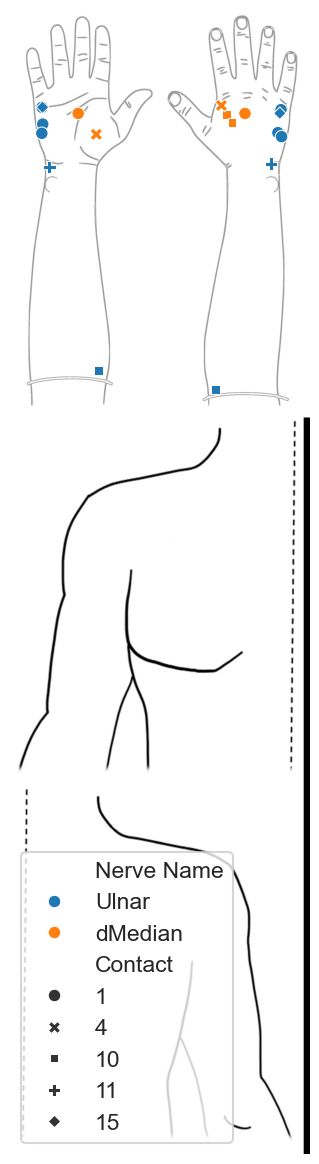

In [16]:
img = cv2.imread("../Media/right arm.png", 1)
image_x_size = img.shape[1]
image_y_size = img.shape[0]
fig = plt.figure(figsize=(image_x_size/500, image_y_size/500))
plt.imshow(img)
sns.scatterplot(
    data=example_data.filter(
        pl.col("Subject ID") == "RCT01"
    ).to_pandas(), x="Centroid X", y="Centroid Y",
    hue="Nerve Name", style="Contact")

plt.axis('off')

# Show Boundaries

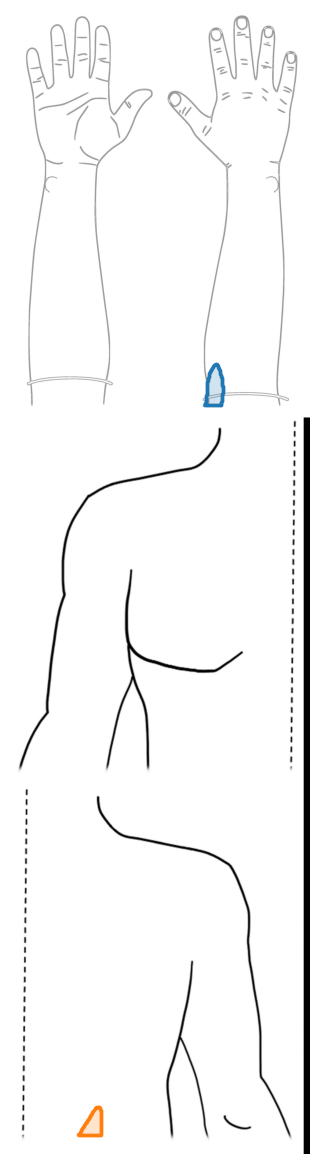

In [17]:
together = False
for row in example_data.filter(
    pl.col("Subject ID") == "RCT02"
    ).iter_rows(named=True):
    if together:
        together = False
    else:
        fig = plt.figure(figsize=(image_x_size/500, image_y_size/500))
        plt.imshow(img)
        together = True
        plt.axis('off')
    boundary = np.array(row["Boundary"])
    plt.plot(boundary[:, 0], boundary[:, 1], '.',
             markersize=3, alpha=0.2)
    plt.fill(boundary[:, 0], boundary[:, 1], alpha=0.2)

# Find border UVs

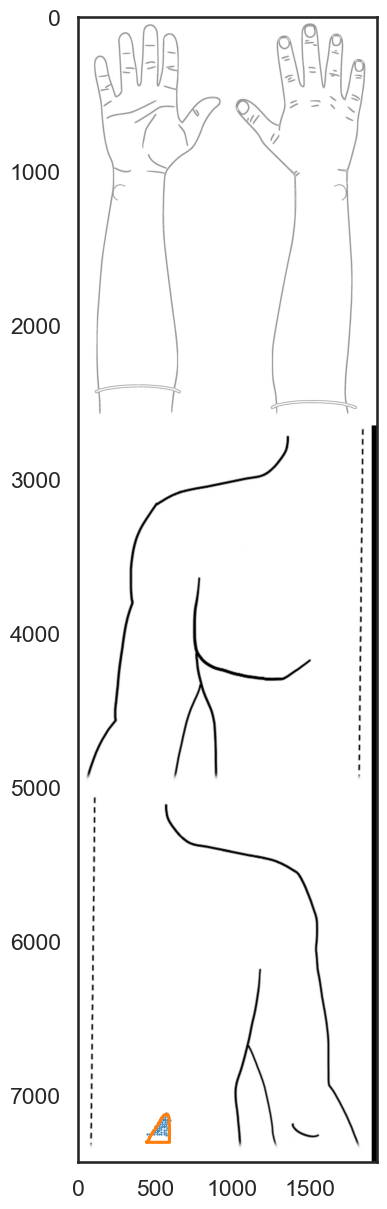

In [18]:
uv_array, lookup_table, import_data = data_manager.load_data("Male Right Arm")
border_uvs = surface.find_uv_indicies(pl.DataFrame(boundary), uv_array,
                                      image_x_size, image_y_size)
border_uvs = surface.clean_uv_border(border_uvs)
enclosed_uvs = surface.find_enclosed_uvs(uv_array, border_uvs)
path = uv_array[enclosed_uvs]
fig = plt.figure(figsize=(image_x_size/500, image_y_size/500))
plt.imshow(img)
plt.plot(path[:, 0] * image_x_size, image_y_size - path[:, 1] * image_y_size,
         '.', markersize=1)
plt.plot(boundary[:, 0], boundary[:, 1])

# Test if Convex Hull will Work

In [19]:
# Load in the Matlab data
data = loadmat(
    "../Data/ExampleLocationDataMultipleDrawingsPerPerceptConvex.mat"
    )

# Get Subject IDs
subject_id = []
for id in data["ExampleData"]["SubjectID"][0]:
    subject_id.append(id[0])

# Get Experiment Date
experiment_date = []
for date in data["ExampleData"]["ExperimentDate"][0]:
    experiment_date.append(datetime.strptime(date[0], "%d-%b-%Y"))

# Get Amputation Site
amputation_site = []
for site in data["ExampleData"]["AmputationSite"][0]:
    amputation_site.append(site[0])

# Get Nerve Name
nerve_name = []
for nerve in data["ExampleData"]["NerveName"][0]:
    nerve_name.append(nerve[0])

# Get Contact
contact = []
for cathode in data["ExampleData"]["Contact"][0]:
    contact.append(cathode[0][0])

# Get Centroid UV Map
centroid_x = []
centroid_y = []
for center in data["ExampleData"]["CentroidUVMap"][0]:
    centroid_x.append(center[0][0])
    centroid_y.append(center[0][1])

# Get Boundary Points
boundary = []
for path in data["ExampleData"]["Boundaries"][0]:
    boundary.append(path.tolist())

# Get Charge
charge = []
for c in data["ExampleData"]["Charge"][0]:
    charge.append(c[0][0])

# Save everything to a polars DataFrame
example_data = pl.DataFrame(
    {
        "Subject ID": subject_id,
        "Experiment Date": experiment_date,
        "Amputation Site": amputation_site,
        "Nerve Name": nerve_name,
        "Contact": contact,
        "Centroid X": centroid_x,
        "Centroid Y": centroid_y,
        "Boundary": boundary,
        "Charge": charge,
    }
)

example_data =\
    example_data.with_row_index().filter(pl.col("index") != 10).drop("index")
example_data

Subject ID,Experiment Date,Amputation Site,Nerve Name,Contact,Centroid X,Centroid Y,Boundary,Charge
str,datetime[μs],str,str,u8,f32,f32,list[list[f64]],u8
"""RCT01""",2021-12-03 00:00:00,"""Right hand""","""Ulnar""",1,212.048645,743.167419,"[[158.306763, 572.925537], [156.331604, 574.890808], … [158.306763, 572.925537]]",65
"""RCT01""",2021-12-03 00:00:00,"""Right hand""","""Ulnar""",1,1739.231689,798.247498,"[[1717.271729, 650.622925], [1715.299316, 652.588379], … [1717.271729, 650.622925]]",65
"""RCT01""",2021-12-16 00:00:00,"""Right hand""","""Ulnar""",1,207.330978,633.712158,"[[119.647011, 277.297211], [117.67186, 279.262451], … [119.647011, 277.297211]]",130
"""RCT01""",2021-12-16 00:00:00,"""Right hand""","""Ulnar""",1,1759.401001,649.339844,"[[1792.730103, 296.3414], [1790.757568, 298.306824], … [1792.730103, 296.3414]]",130
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",1,206.142929,802.52948,"[[162.02887, 659.624023], [160.053711, 661.589294], … [162.02887, 659.624023]]",57
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",1,1762.672119,824.170349,"[[1756.538086, 713.70105], [1754.565552, 715.666504], … [1756.538086, 713.70105]]",57
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",10,574.0224,2345.126221,"[[552.0, 2219.5], [551.5, 2220.0], … [552.0, 2219.5]]",50
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",10,1332.65332,2465.617188,"[[1276.0, 2328.5], [1275.5, 2329.0], … [1276.0, 2328.5]]",50
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",11,255.236603,1021.07312,"[[122.0, 271.5], [121.5, 272.0], … [122.0, 271.5]]",117


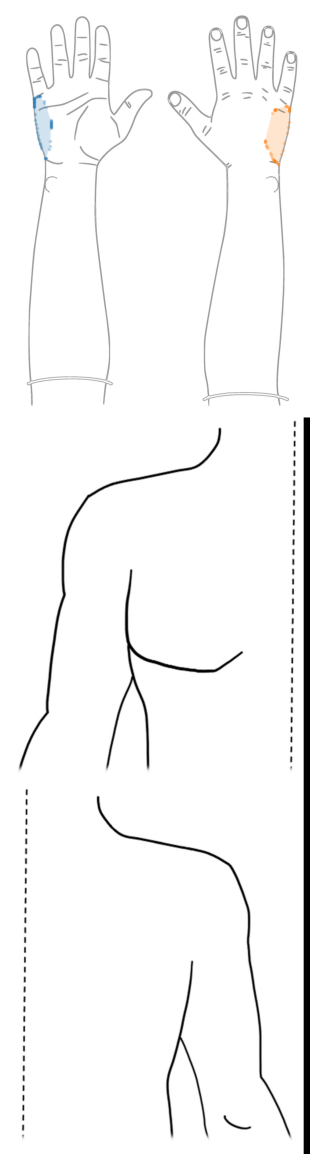

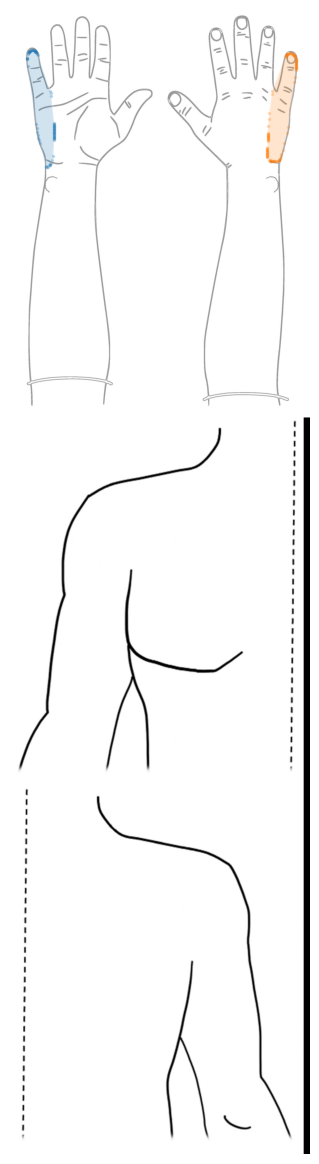

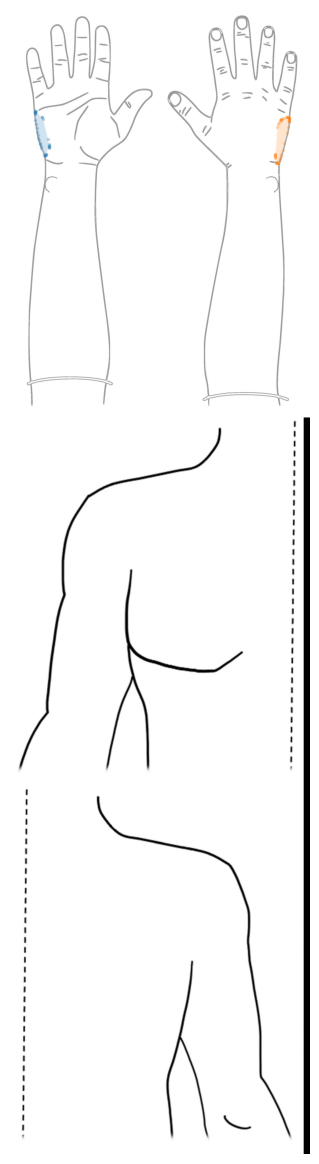

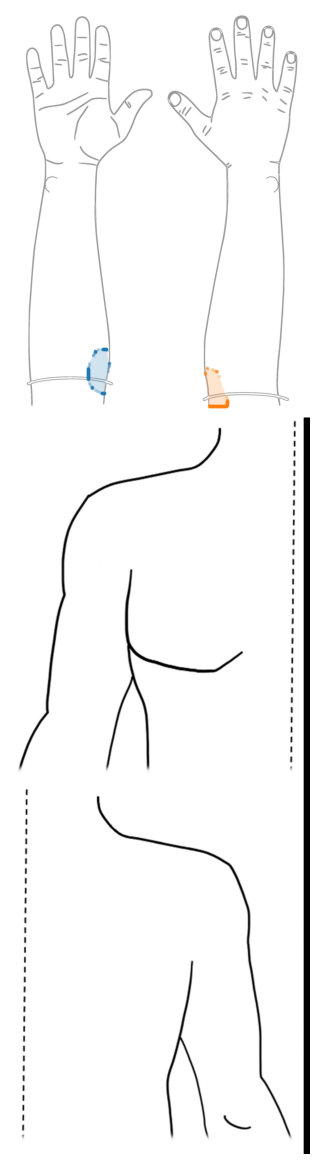

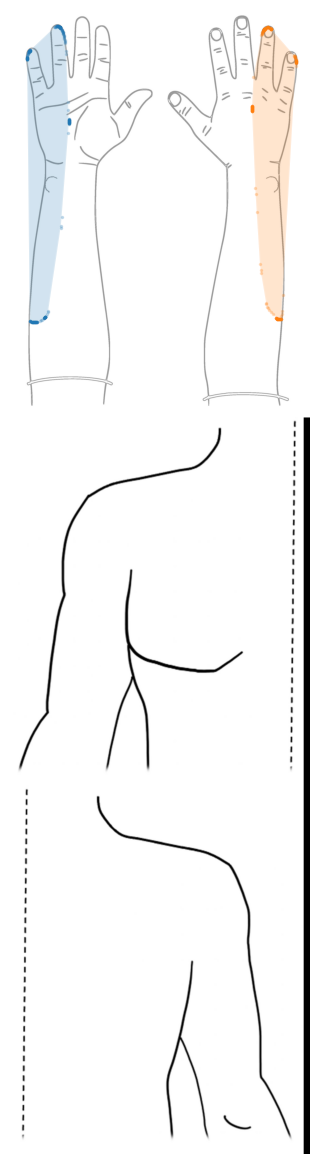

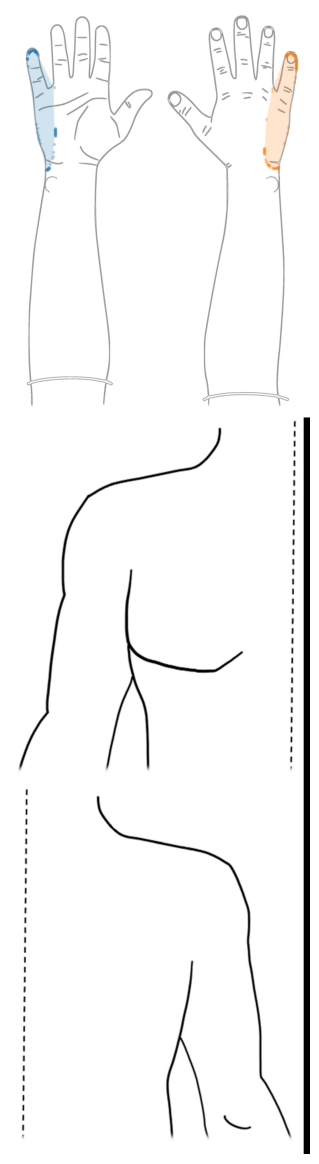

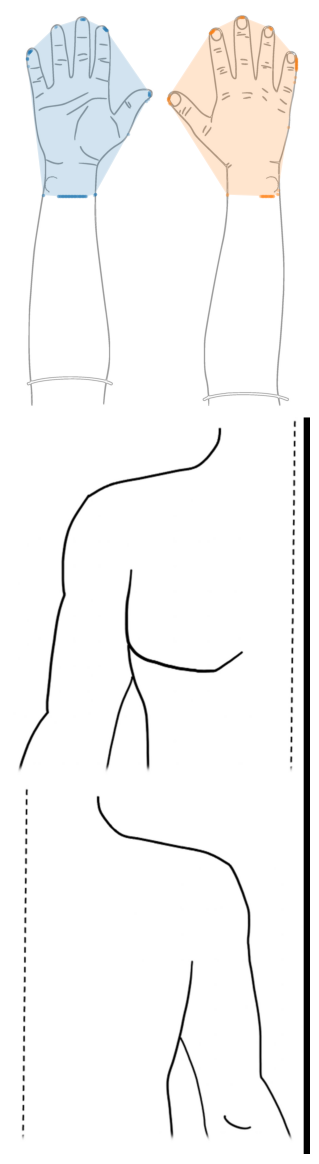

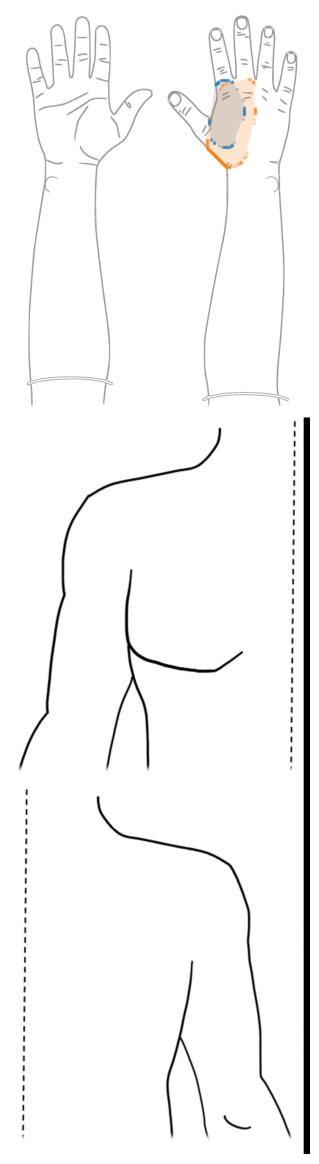

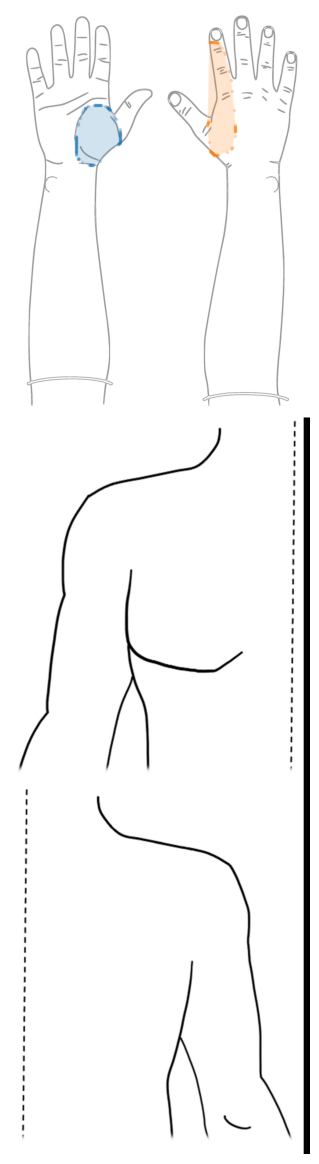

In [20]:
together = False
for row in example_data.filter(
    pl.col("Subject ID") == "RCT01"
    ).iter_rows(named=True):
    if together:
        together = False
    else:
        fig = plt.figure(figsize=(image_x_size/500, image_y_size/500))
        plt.imshow(img)
        together = True
        plt.axis('off')
    boundary = np.array(row["Boundary"])
    plt.plot(boundary[:, 0], boundary[:, 1], '.',
             markersize=3, alpha=0.2)
    plt.fill(boundary[:, 0], boundary[:, 1], alpha=0.2)

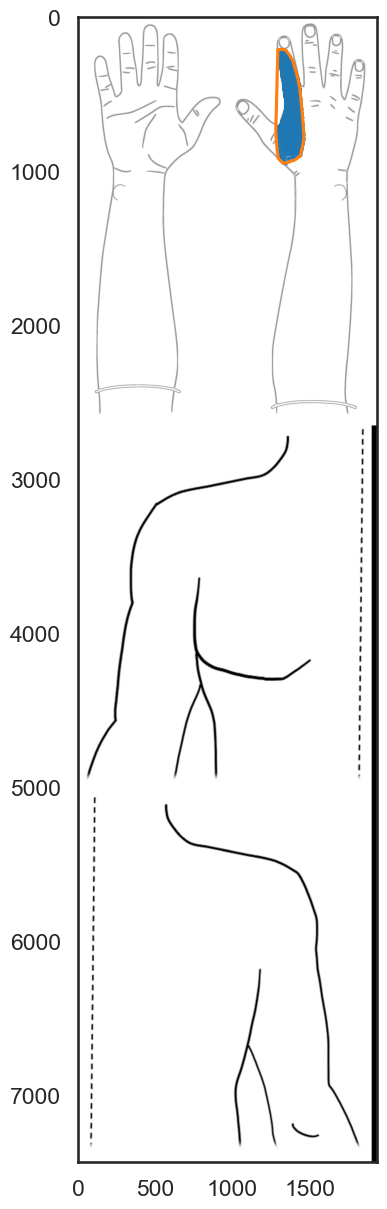

In [21]:
border_uvs = surface.find_uv_indicies(pl.DataFrame(boundary), uv_array,
                                      image_x_size, image_y_size)
border_uvs = surface.clean_uv_border(border_uvs)
enclosed_uvs = surface.find_enclosed_uvs(uv_array, border_uvs)
path = uv_array[enclosed_uvs]
fig = plt.figure(figsize=(image_x_size/500, image_y_size/500))
plt.imshow(img)
plt.plot(path[:, 0] * image_x_size, image_y_size - path[:, 1] * image_y_size,
         '.', markersize=1)
plt.plot(boundary[:, 0], boundary[:, 1])

Looks like it will

# Add a drawing number

In [22]:
drawing_numbers =\
    [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
example_data = example_data.with_columns(pl.Series(name="Drawing Number",
                                                   values=drawing_numbers))
example_data

Subject ID,Experiment Date,Amputation Site,Nerve Name,Contact,Centroid X,Centroid Y,Boundary,Charge,Drawing Number
str,datetime[μs],str,str,u8,f32,f32,list[list[f64]],u8,i64
"""RCT01""",2021-12-03 00:00:00,"""Right hand""","""Ulnar""",1,212.048645,743.167419,"[[158.306763, 572.925537], [156.331604, 574.890808], … [158.306763, 572.925537]]",65,1
"""RCT01""",2021-12-03 00:00:00,"""Right hand""","""Ulnar""",1,1739.231689,798.247498,"[[1717.271729, 650.622925], [1715.299316, 652.588379], … [1717.271729, 650.622925]]",65,1
"""RCT01""",2021-12-16 00:00:00,"""Right hand""","""Ulnar""",1,207.330978,633.712158,"[[119.647011, 277.297211], [117.67186, 279.262451], … [119.647011, 277.297211]]",130,2
"""RCT01""",2021-12-16 00:00:00,"""Right hand""","""Ulnar""",1,1759.401001,649.339844,"[[1792.730103, 296.3414], [1790.757568, 298.306824], … [1792.730103, 296.3414]]",130,2
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",1,206.142929,802.52948,"[[162.02887, 659.624023], [160.053711, 661.589294], … [162.02887, 659.624023]]",57,3
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",1,1762.672119,824.170349,"[[1756.538086, 713.70105], [1754.565552, 715.666504], … [1756.538086, 713.70105]]",57,3
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",10,574.0224,2345.126221,"[[552.0, 2219.5], [551.5, 2220.0], … [552.0, 2219.5]]",50,4
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",10,1332.65332,2465.617188,"[[1276.0, 2328.5], [1275.5, 2329.0], … [1276.0, 2328.5]]",50,4
"""RCT01""",2022-10-05 00:00:00,"""Right hand""","""Ulnar""",11,255.236603,1021.07312,"[[122.0, 271.5], [121.5, 272.0], … [122.0, 271.5]]",117,5


# Find the UV points in each Drawing

In [32]:
# Get unique drawing numbers
drawing_ids = example_data["Drawing Number"].unique().to_list()
for id in drawing_ids:
    drawing_dataframe = example_data.filter(pl.col("Drawing Number") == id)

    first = True
    for row in drawing_dataframe.iter_rows(named=True):
        if (row["Subject ID"] == "RCT01"):
            uv_array, lookup_table, import_data =\
                data_manager.load_data("Male Right Arm")
        else:
            uv_array, lookup_table, import_data =\
                data_manager.load_data("Male Left Arm")

        boundary = np.array(row["Boundary"])
        border_uvs = surface.find_uv_indicies(pl.DataFrame(boundary), uv_array,
                                              image_x_size, image_y_size)
        border_uvs = surface.clean_uv_border(border_uvs)
        enclosed_uvs = surface.find_enclosed_uvs(uv_array, border_uvs)
        location_vertex_ids = surface.convert_uv_to_vertex_id(
            enclosed_uvs, lookup_table)
        if first:
            location_vertex_ids_1 = location_vertex_ids
            first = False
        else:
            location_vertex_ids_2 = location_vertex_ids
    common_verticies =\
        np.intersect1d(location_vertex_ids_1, location_vertex_ids_2)
    if(np.any(common_verticies)):
        print("There are common verticies")
        combined_boundary_ids =\
            np.unique(
                np.append(location_vertex_ids_1, location_vertex_ids_2)
                )
        mesh_faces =\
            pl.DataFrame(import_data["mesh_faces"], schema=["p1", "p2", "p3"])
        location_faces =\
            mesh_faces.filter((pl.col("p1").is_in(combined_boundary_ids)) &
                              (pl.col("p2").is_in(combined_boundary_ids)) &
                              (pl.col("p3").is_in(combined_boundary_ids)))
        surface_faces = []
        for row in location_faces.iter_rows(named=True):
            surface_faces.append(3)
            surface_faces.append(row["p1"])
            surface_faces.append(row["p2"])
            surface_faces.append(row["p3"])
        poly_data = pv.PolyData(import_data["mesh_verticies"],
                                faces=surface_faces)
        shell = poly_data.extract_geometry()
        p = pv.Plotter()
        p.add_mesh(shell, show_edges=True, cmap=plt.cm.Spectral)
        p.show()
    else:
        print("No common verticies")
        location_surface_1 =\
            np.array(import_data["mesh_verticies"][location_vertex_ids_1])
        shell_1 = surface.create_surface(location_surface_1, 0)
        location_surface_2 =\
            np.array(import_data["mesh_verticies"][location_vertex_ids_2])
        shell_2 = surface.create_surface(location_surface_2, 0)

e:\Geodesic-Path-Finder\Code\drawingto3D\surface.py:118: RuntimeWarning: invalid value encountered in cast
  vertex_ids = np.empty((len(uv_indicies))).astype(int)


There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289b937d130_38&reconnect=auto' style='widt…

There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289ccf2c0a0_39&reconnect=auto' style='widt…

e:\Geodesic-Path-Finder\Code\drawingto3D\surface.py:118: RuntimeWarning: invalid value encountered in cast
  vertex_ids = np.empty((len(uv_indicies))).astype(int)


There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289ccdd3880_40&reconnect=auto' style='widt…

e:\Geodesic-Path-Finder\Code\drawingto3D\surface.py:118: RuntimeWarning: invalid value encountered in cast
  vertex_ids = np.empty((len(uv_indicies))).astype(int)


There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289ccf23b50_41&reconnect=auto' style='widt…

There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289ccf23eb0_42&reconnect=auto' style='widt…

e:\Geodesic-Path-Finder\Code\drawingto3D\surface.py:118: RuntimeWarning: invalid value encountered in cast
  vertex_ids = np.empty((len(uv_indicies))).astype(int)


There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289de76ebe0_43&reconnect=auto' style='widt…

There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289ccf23dc0_44&reconnect=auto' style='widt…

e:\Geodesic-Path-Finder\Code\drawingto3D\surface.py:118: RuntimeWarning: invalid value encountered in cast
  vertex_ids = np.empty((len(uv_indicies))).astype(int)


There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289f51a6910_45&reconnect=auto' style='widt…

There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x289de76eb20_46&reconnect=auto' style='widt…

There are common verticies


Widget(value="<iframe src='http://localhost:53785/index.html?ui=P_0x28a13e48820_47&reconnect=auto' style='widt…

In [28]:
mesh_faces =\
    pl.DataFrame(import_data["mesh_faces"], schema=["p1", "p2", "p3"])
location_surface =\
    mesh_faces.filter((pl.col("p1").is_in(combined_boundary_ids)) &
                        (pl.col("p2").is_in(combined_boundary_ids)) &
                        (pl.col("p3").is_in(combined_boundary_ids)))

In [29]:
print(mesh_faces)
print(location_surface)

shape: (416_256, 3)
┌────────┬────────┬───────┐
│ p1     ┆ p2     ┆ p3    │
│ ---    ┆ ---    ┆ ---   │
│ i64    ┆ i64    ┆ i64   │
╞════════╪════════╪═══════╡
│ 25605  ┆ 25619  ┆ 25604 │
│ 25606  ┆ 25620  ┆ 25605 │
│ 25607  ┆ 25621  ┆ 25606 │
│ 25608  ┆ 25622  ┆ 25607 │
│ 25609  ┆ 25623  ┆ 25608 │
│ …      ┆ …      ┆ …     │
│ 208349 ┆ 208364 ┆ 25149 │
│ 208334 ┆ 208349 ┆ 25150 │
│ 208319 ┆ 208334 ┆ 25151 │
│ 208304 ┆ 208319 ┆ 25152 │
│ 37574  ┆ 37589  ┆ 5754  │
└────────┴────────┴───────┘
shape: (1_846, 3)
┌───────┬────────┬────────┐
│ p1    ┆ p2     ┆ p3     │
│ ---   ┆ ---    ┆ ---    │
│ i64   ┆ i64    ┆ i64    │
╞═══════╪════════╪════════╡
│ 78255 ┆ 78269  ┆ 78254  │
│ 78256 ┆ 78270  ┆ 78255  │
│ 78257 ┆ 78271  ┆ 78256  │
│ 78258 ┆ 78272  ┆ 78257  │
│ 78259 ┆ 78273  ┆ 78258  │
│ …     ┆ …      ┆ …      │
│ 8457  ┆ 104594 ┆ 104609 │
│ 8458  ┆ 104579 ┆ 104594 │
│ 11564 ┆ 104804 ┆ 8443   │
│ 11565 ┆ 104805 ┆ 104804 │
│ 11566 ┆ 104806 ┆ 104805 │
└───────┴────────┴────────┘
